### I've gone through your code and made some changes/comments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr                       # I've shortened this name as 'xr' to shorten the code 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
from datetime import date, time, datetime 
import pandas as pd # bigger version on numpy, works with matrices

#import the file as a dataset
filename = 'Sentinel3A_NRT_2019_2020.nc'
dataset = xr.open_dataset(filename)
print("The dataset is:", dataset)   # I reduced the two previous lines of code to one line 

The dataset is: <xarray.Dataset>
Dimensions:    (along-track position: 342, cycle number: 14, track number: 72)
Dimensions without coordinates: along-track position, cycle number, track number
Data variables:
    time       (cycle number, along-track position, track number) datetime64[ns] ...
    longitude  (along-track position, track number) float64 ...
    latitude   (along-track position, track number) float64 ...
    cycle      (cycle number) float64 ...
    track      (track number) float64 ...
    adt        (cycle number, along-track position, track number) float64 ...
    sla        (cycle number, along-track position, track number) float64 ...
    tide       (cycle number, along-track position, track number) float64 ...
Attributes:
    time_period:       22-Aug-2019 -to- 05-Aug-2020
    longitude_min:     -139.998985
    longitude_max:     -110.00401
    latitude_min:      25.000019
    latitude_max:      44.997383
    processing_level:  L3; 18.5.0_DUACS_DT2018_baseline (DT =

### This function (plot_netcdf_alongtrack) accepts 3 inputs: 'dataset', 'data', and 'title'
### But data is just a component of 'dataset'. So you can just specify one or the other, that is:
### 1) give the function the dataset - and let the function read in lon/lat/adt (best if you know the data will be the same everytime)

### 2) open the dataset before running the function, and then give the function lon/lat/adt to plot (best if you think the data format might change)


In [54]:
#function to plot data (alongtrack, but using aviso data to test the function)
def plot_netcdf_alongtrack(dataset, data, title):    # here I corrected ncdef -> netcdf
    # binary --> calculate mean, add input that's a binary to determine what to plot
    # for example, write function plot_mean so during the function call, if plot_mean =
    #extract variables
    long = dataset['longitude']
    lat = dataset['latitude']
    print('the long is:', long)
    print('the lat is:', lat)
    
    #create plot
    plt.figure()
    fig, ax = plt.subplots(1)
    plt.pcolormesh(long, lat, data) #original function used imshow, attempting to use pcolormesh

    #colorbar creation
    plt.colorbar()
    
    #title creation
    plt.title(title)
    
    plt.show()

the long is: <xarray.DataArray 'longitude' (longitude: 161)>
array([-149.875, -149.625, -149.375, -149.125, -148.875, -148.625, -148.375,
       -148.125, -147.875, -147.625, -147.375, -147.125, -146.875, -146.625,
       -146.375, -146.125, -145.875, -145.625, -145.375, -145.125, -144.875,
       -144.625, -144.375, -144.125, -143.875, -143.625, -143.375, -143.125,
       -142.875, -142.625, -142.375, -142.125, -141.875, -141.625, -141.375,
       -141.125, -140.875, -140.625, -140.375, -140.125, -139.875, -139.625,
       -139.375, -139.125, -138.875, -138.625, -138.375, -138.125, -137.875,
       -137.625, -137.375, -137.125, -136.875, -136.625, -136.375, -136.125,
       -135.875, -135.625, -135.375, -135.125, -134.875, -134.625, -134.375,
       -134.125, -133.875, -133.625, -133.375, -133.125, -132.875, -132.625,
       -132.375, -132.125, -131.875, -131.625, -131.375, -131.125, -130.875,
       -130.625, -130.375, -130.125, -129.875, -129.625, -129.375, -129.125,
       -128.875

<ipython-input-54-91b7a520b27f>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(long, lat, data) #original function used imshow, attempting to use pcolormesh


<Figure size 432x288 with 0 Axes>

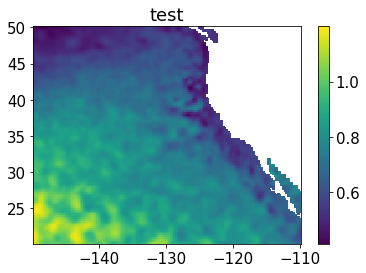

In [55]:
#testing the plotting function with the aviso data set

#opening the dataset
filename = '/Users/emmagurcan/Documents/JPL 2021/aviso data/dataset-duacs-nrt-global-merged-allsat-phy-l4_1588116812229.nc'
dset = xr.open_dataset(filename)

#selecting day 1 from the adt set
adt = dset['adt']
day_1 = adt[0, :, :]

#test title
t = 'test'

#function call
plot_netcdf_alongtrack(dset, day_1, t)

### Here I'll try plotting the AVISO dataset with coastlines:

AttributeError: 'NoneType' object has no attribute 'lower'

/Users/emmagurcan/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


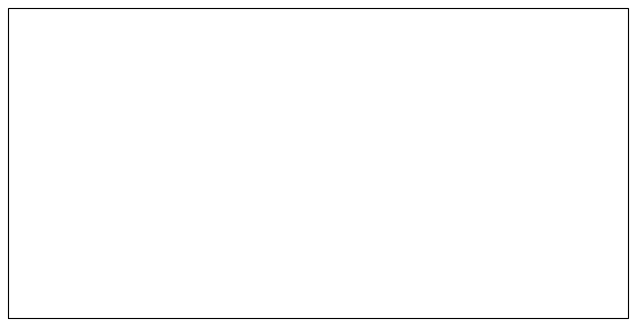

In [56]:
    # >>>------------------------> PREPARE DATA

    # Load in dataset
    dset = xr.open_dataset('/Users/emmagurcan/Documents/JPL 2021/aviso data/dataset-duacs-nrt-global-merged-allsat-phy-l4_1588116812229.nc')  # print(dset)

    # Load in variables
    adt = dset['adt']
    long = dset['longitude']
    lat = dset['latitude']
    time = dset['time'] # in 'time' format
    
    # >>>------------------------> PLOT FIGURE
    
    # Choose a time
    index = np.where(time == np.datetime64('2019-09-19'))   # this snippet of code looks for where time = a chosen date (here Aug 10th) and will plot that (rather than just choosing the first time at index=0)
    # np.datetime64 converts a date into a time format
    
    # Set up figure axes
    fig = plt.figure(figsize=(10, 8), dpi=80) # make the figure larger
    # dpi = pixel resolution
    
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # define the map projection
#     ax.set_extent([min(long), max(long), min(lat), max(lat)], crs=ccrs.PlateCarree()) # define limits using data
#     gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=.5, color='gray', alpha=0.5, linestyle='--') # include gridlines on map
#     gl.top_labels = False     # don't want to plot labels on top side
#     gl.right_labels = False   # don't want to plot labels on right-hand side

    # Plot ADT data
    x = np.squeeze(adt[index[0],:,:])
    np.shape(x)
    plt.pcolormesh(long, lat, x) # squeeze --> adt is a shape of time, lon, lat (3-D)
    # we want to plot 1 time
    
    # Add coastlines
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE) # or... ax.coastlines()
    
    # Include colorbar, title, increase font
    cbar = plt.colorbar(shrink=0.75) #here I shrunk the colobar to fit the map size
    cbar.set_label('Absolute dynamic topography (m)')
    plt.title(np.datetime_as_string(time[index].data, unit='D'),fontsize=20) # here I've used the time variable to give the title as the time of observation
    plt.rc('font', size=15) # Increase fontsize for readability
    
    plt.show()
    

In [27]:
print(x)

<xarray.DataArray 'adt' (latitude: 121, longitude: 161)>
array([[1.0771, 1.0704, 1.0709, ..., 0.6979, 0.7124, 0.7316],
       [1.0733, 1.0681, 1.0654, ..., 0.6822, 0.7039, 0.7301],
       [1.0682, 1.0653, 1.0587, ..., 0.6935, 0.7197, 0.7491],
       ...,
       [0.451 , 0.4573, 0.4614, ...,    nan,    nan,    nan],
       [0.4373, 0.4402, 0.4416, ...,    nan,    nan,    nan],
       [0.4281, 0.428 , 0.4278, ...,    nan,    nan,    nan]])
Coordinates:
    time       datetime64[ns] 2019-09-19
  * latitude   (latitude) float32 20.12 20.38 20.62 20.88 ... 49.62 49.88 50.12
  * longitude  (longitude) float32 -149.9 -149.6 -149.4 ... -110.4 -110.1 -109.9
Attributes:
    comment:        The absolute dynamic topography is the sea surface height...
    grid_mapping:   crs
    long_name:      Absolute dynamic topography
    standard_name:  sea_surface_height_above_geoid
    units:          m
    _ChunkSizes:    [ 1 50 50]


In [8]:
print(np.shape(x))

(121, 161)


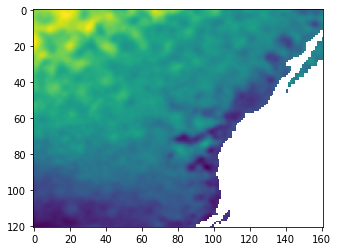

In [9]:
plt.imshow(x)

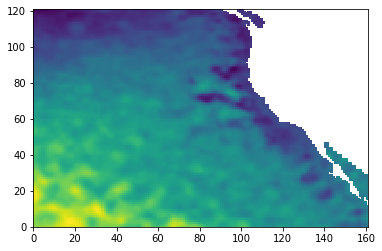

In [10]:
plt.pcolormesh(x)

'flat'

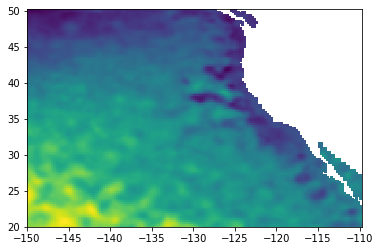

In [17]:
plt.pcolormesh(long, lat, x, shading = 'auto')
plt.rcParams['pcolor.shading']

In [ ]:
def check_nan(data):
    for i in data:
        if i == 'nan':
            i = 0